In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io

import matplotlib.pyplot as plt

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1296x1296 with 1 Axes>, <AxesSubplot:>)

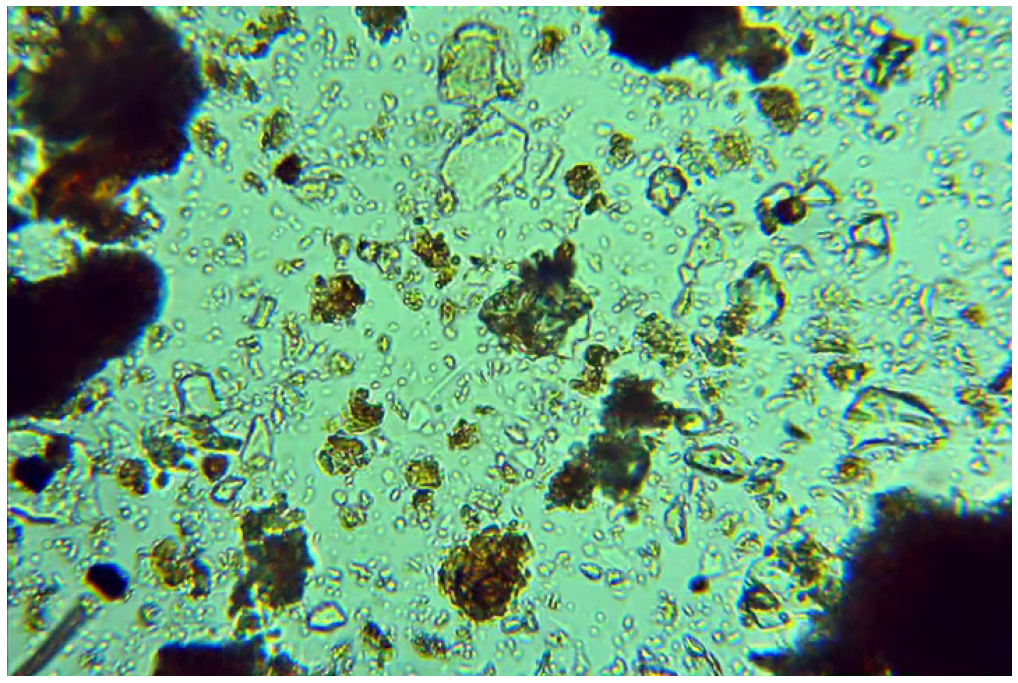

In [3]:
image = io.imread("scene00701.png")
image_show(image)

(<Figure size 1296x1296 with 1 Axes>, <AxesSubplot:>)

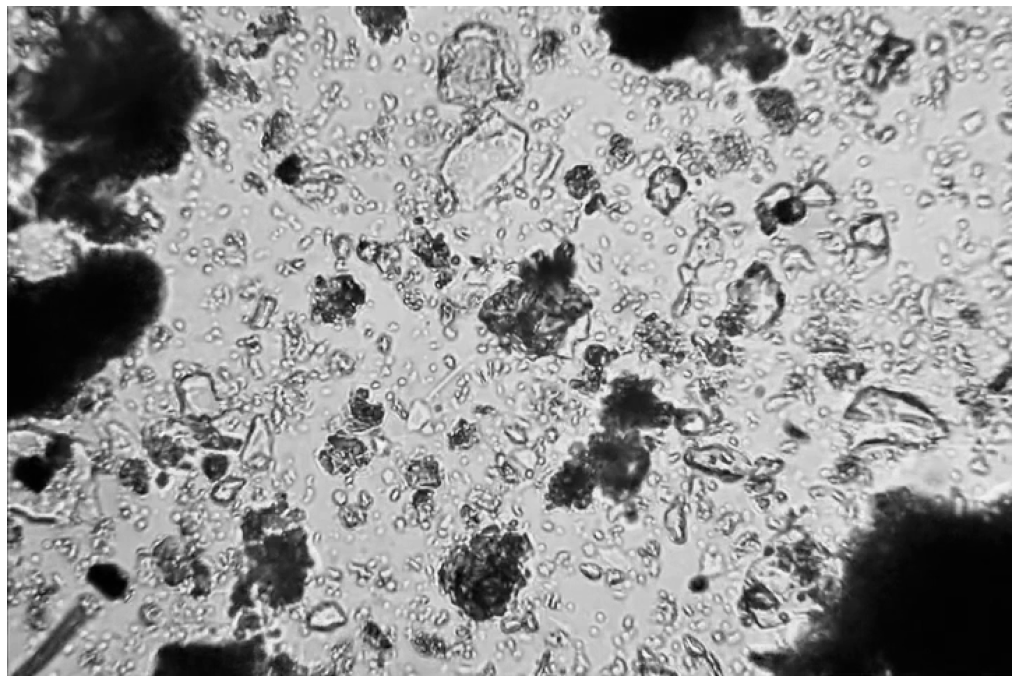

In [4]:
image_gray = rgb2gray(image)
image_show(image_gray)

In [5]:
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\david\.conda\envs\fastai\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning

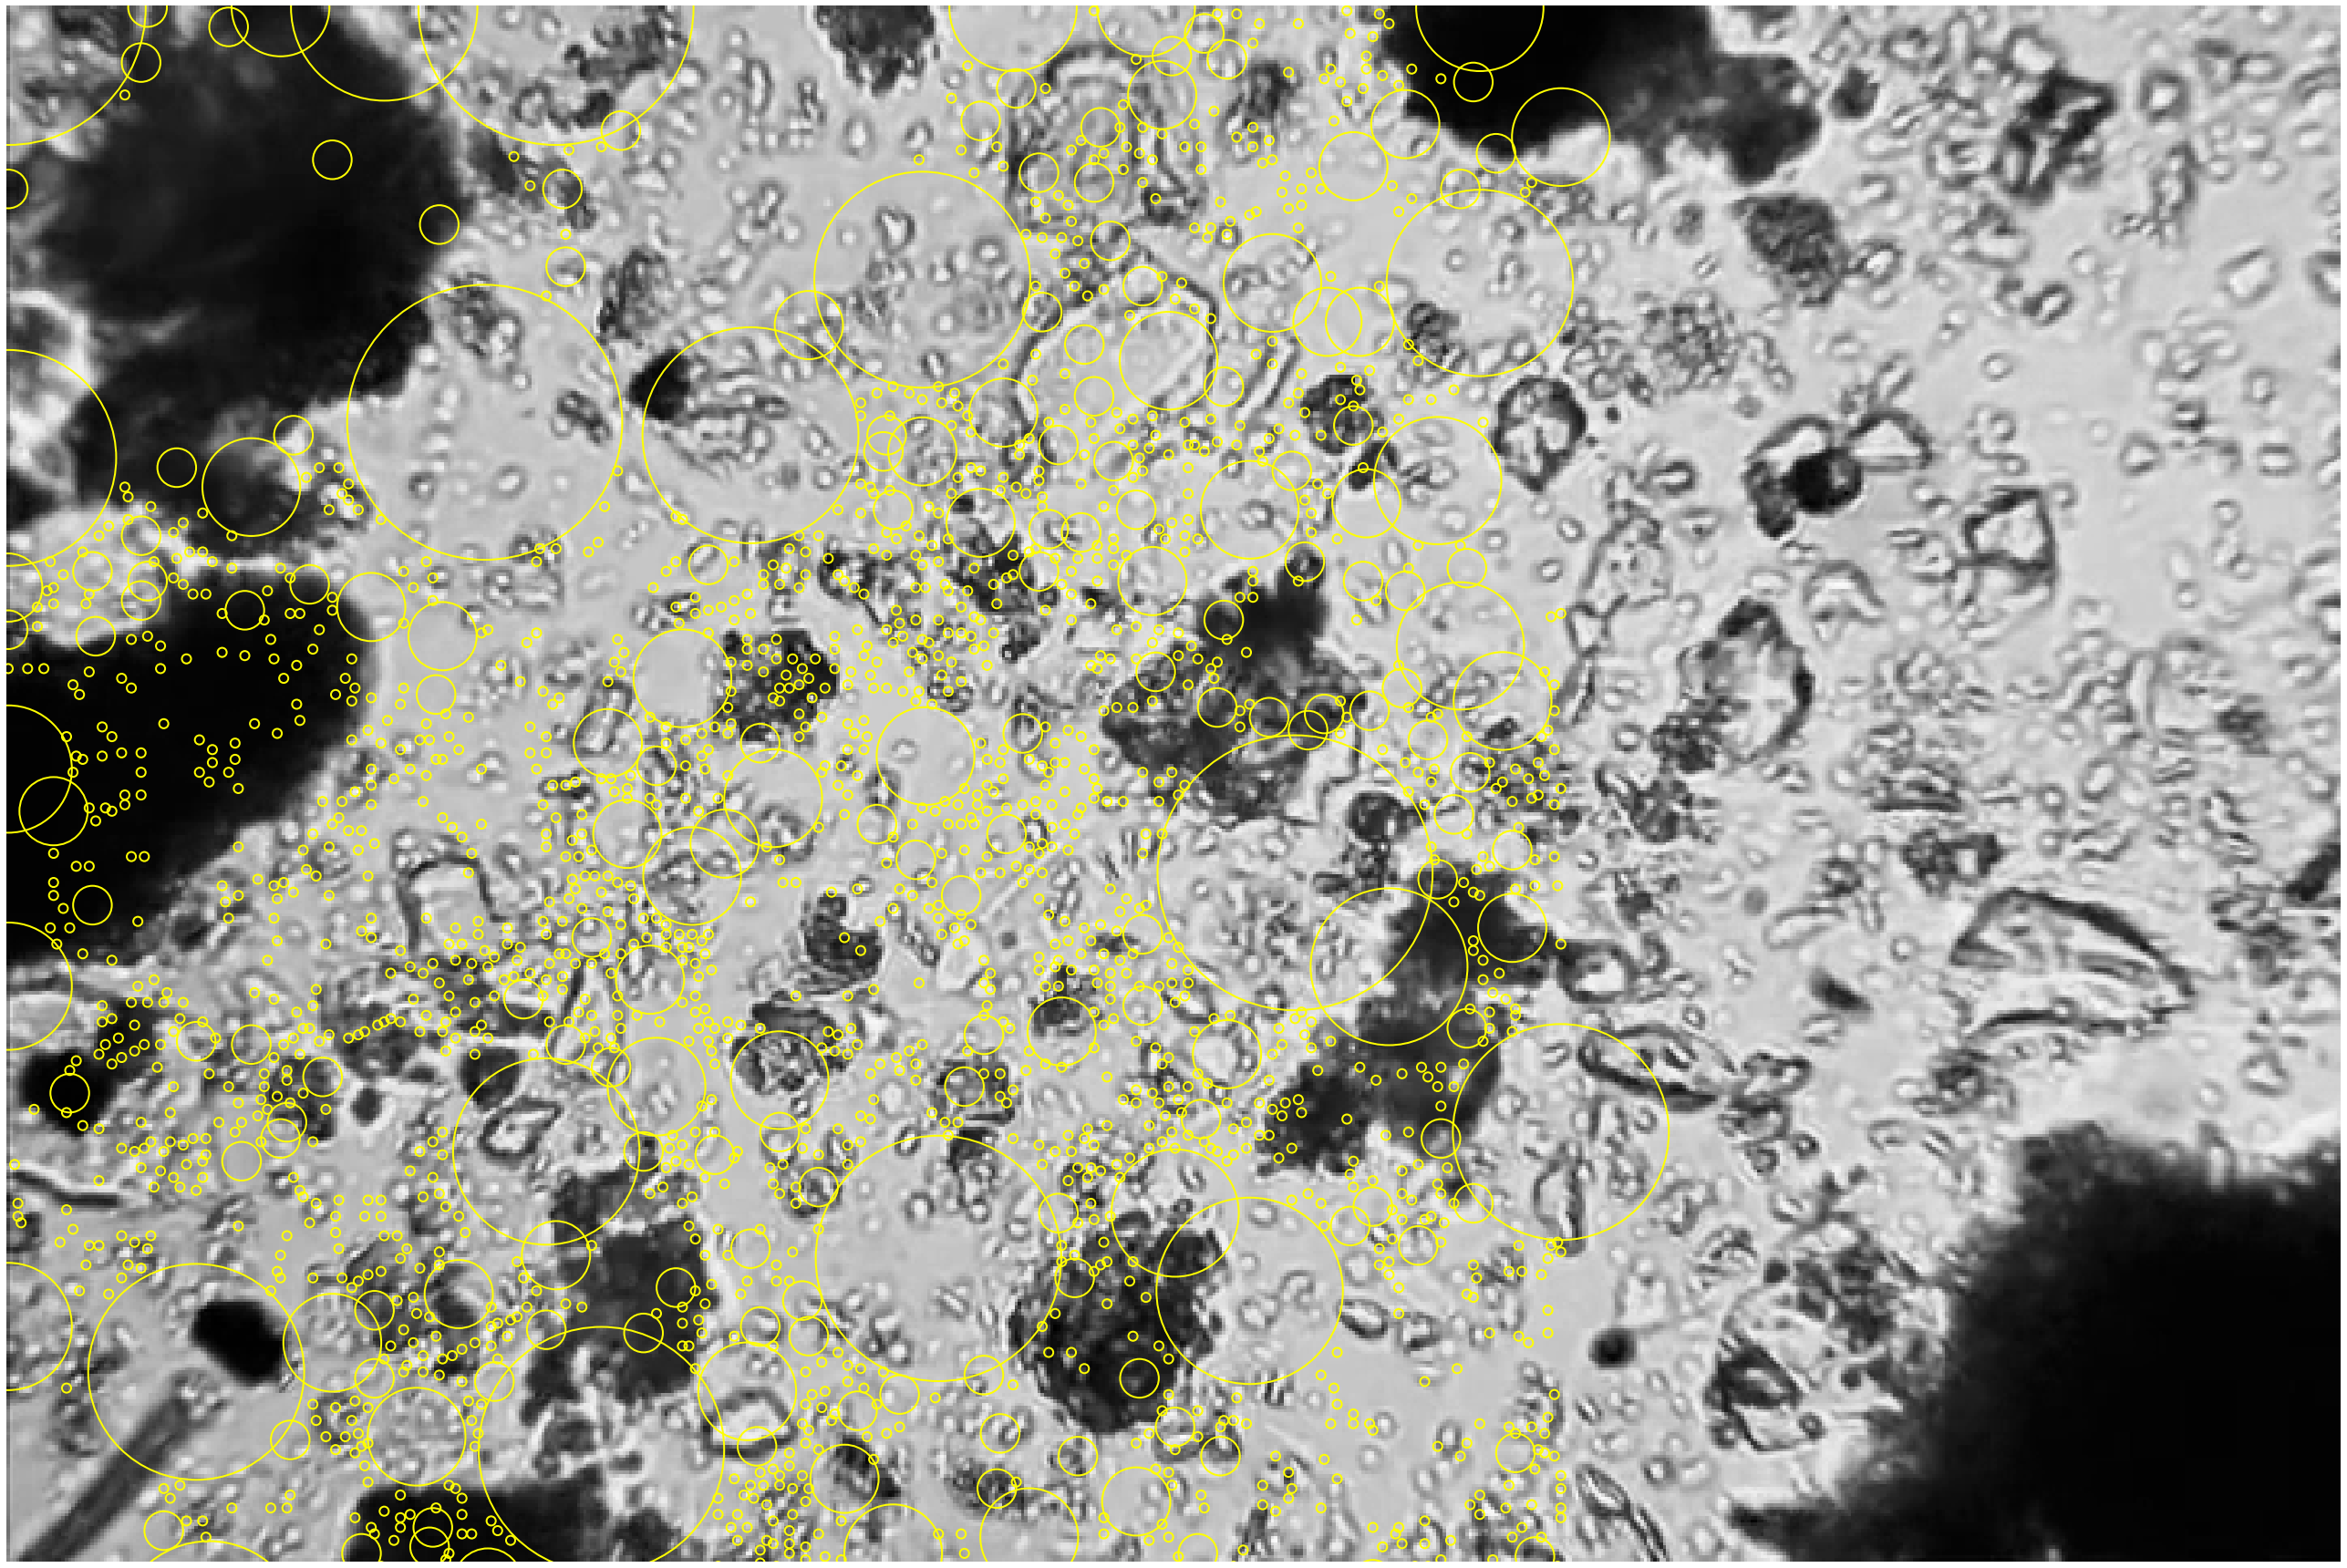

In [12]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(72,24))

ax.imshow(image_gray, cmap='gray')

for blob in blobs_log:
    x,y,r = blob
    c = plt.Circle((x,y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

plt.tight_layout()
plt.show()